In [655]:
import scipy 
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [656]:
img = cv2.imread("hyttest2.png")
print(img)

[[[ 23  23  23]
  [ 22  22  22]
  [ 24  24  24]
  ...
  [ 99  99  99]
  [100 100 100]
  [100 100 100]]

 [[ 28  28  28]
  [ 28  28  28]
  [ 29  29  29]
  ...
  [ 98  98  98]
  [101 101 101]
  [104 104 104]]

 [[ 35  35  35]
  [ 36  36  36]
  [ 36  36  36]
  ...
  [ 99  99  99]
  [ 99  99  99]
  [ 98  98  98]]

 ...

 [[ 31  31  31]
  [ 31  31  31]
  [ 31  31  31]
  ...
  [ 29  29  29]
  [ 28  28  28]
  [ 27  27  27]]

 [[ 30  30  30]
  [ 29  29  29]
  [ 29  29  29]
  ...
  [ 29  29  29]
  [ 28  28  28]
  [ 29  29  29]]

 [[ 31  31  31]
  [ 29  29  29]
  [ 30  30  30]
  ...
  [ 26  26  26]
  [ 27  27  27]
  [ 28  28  28]]]


In [657]:
print(np.shape(img),
type(img),
img.dtype)

(1944, 2592, 3) <class 'numpy.ndarray'> uint8


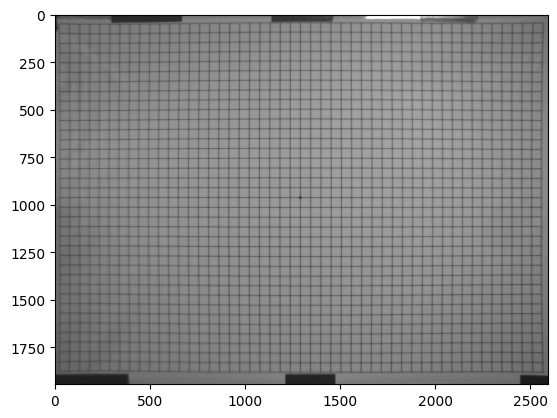

In [658]:
plt.imshow(img)
plt.show()

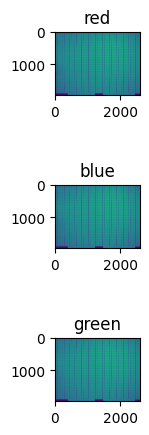

In [659]:
img_red = img[:,:,0]
img_blue = img[:,:,1]
img_green = img[:,:,2]

plt.subplot(5,1,1)
plt.title("red")
plt.imshow(img_red)

plt.subplot(5,1,3)
plt.title("blue")

plt.imshow(img_blue)
plt.subplot(5,1,5)
plt.title("green")

plt.imshow(img_green)
plt.show()


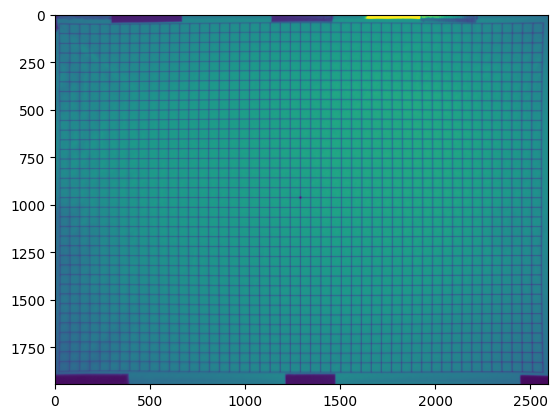

In [660]:
plt.figure()
plt.imshow(img_red)
plt.show()

### Image Enhancement Techniques
* The principal objective of Image Enhancement is to process an image so that the result is more suitable than the original image for a particular application. However, there are mainly TWO approaches towards image enhancement. A saptial domain approach and a frequency domain approach.

#### Spatial Domain Approach
* It refers to the image plane itself and involves direct manipuation of the pixels of an image.

#### Frequency Domain Technique
* Frequency domain processing techniques are based on modifying the Fourier Transform of an image.

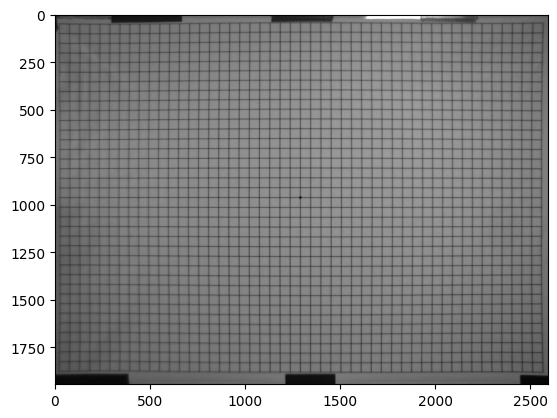

In [661]:
from PIL import Image
img_gray = Image.open("hyttest2.png")
img_gray = img_gray.convert("L")
plt.imshow(img_gray , cmap="gray")
plt.show()

(array([0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 2.80000e+01,
        8.01000e+03, 1.88690e+04, 1.08640e+04, 1.15370e+04, 4.20100e+03,
        7.45000e+03, 6.38100e+03, 7.09800e+03, 1.18470e+04, 2.32510e+04,
        4.66380e+04, 7.99010e+04, 1.03571e+05, 1.27802e+05, 1.57428e+05,
        2.25757e+05, 2.25806e+05, 2.63191e+05, 2.98200e+05, 3.41982e+05,
        4.12032e+05, 4.76792e+05, 5.15293e+05, 5.26871e+05, 4.91499e+05,
        4.16004e+05, 1.83812e+05, 2.64930e+04, 5.73000e+02, 4.01000e+02,
        4.24000e+02, 4.43000e+02, 5.16000e+02, 4.38000e+02, 2.12000e+02,
        1.75000e+02, 8.40000e+01, 4.30000e+01, 4.20000e+01, 2.90000e+01,
        3.80000e+01, 4.10000e+01, 5.60000e+01, 6.20000e+01, 6.66300e+03]),
 array([  0. ,   5.1,  10.2,  15.3,  20.4,  25.5,  30.6,  35.7,  40.8,
         45.9,  51. ,  56.1,  61.2,  66.3,  71.4,  76.5,  81.6,  86.7,
         91.8,  96.9, 102. , 107.1, 112.2, 117.3, 122.4, 127.5, 132.6,
        137.7, 142.8, 147.9, 153. , 158.1, 163.2, 168.3

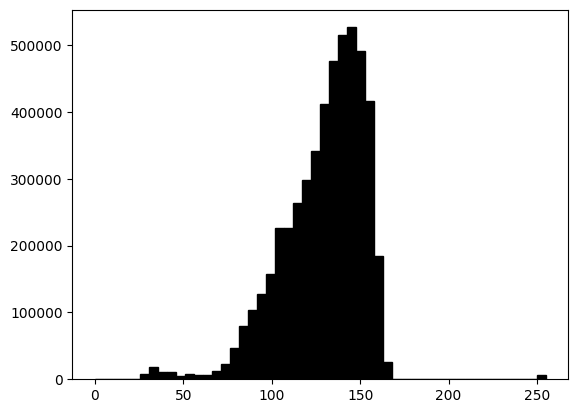

In [662]:

img_gray = cv2.cvtColor(img , cv2.COLOR_BGR2GRAY)
plt.hist(img_gray.flatten(),50, range=(0, 255), fc='k', ec='k')


Let us now narrow the contrast the image

In [663]:
maxi = np.amax(img_gray)
mini = np.amin(img_gray)
Intensity_img = maxi - mini

In [664]:
print('lowest intensity:', mini, ', highest intensity:', maxi, ', spread:', Intensity_img)

lowest intensity: 22 , highest intensity: 255 , spread: 233


taking inverse intesity of image

img_gray

In [665]:
a = np.array(img_gray)

In [666]:
print(a)

[[ 23  22  24 ...  99 100 100]
 [ 28  28  29 ...  98 101 104]
 [ 35  36  36 ...  99  99  98]
 ...
 [ 31  31  31 ...  29  28  27]
 [ 30  29  29 ...  29  28  29]
 [ 31  29  30 ...  26  27  28]]


In [667]:
invers_intensity = np.absolute(a - (255/1))

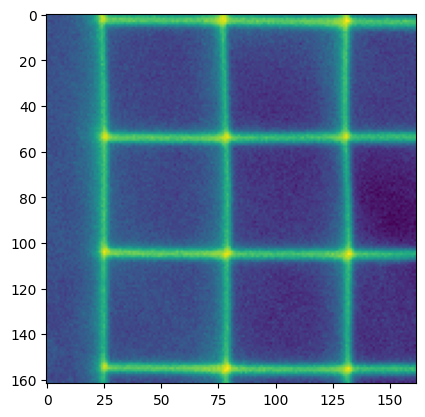

In [668]:
plt.imshow(invers_intensity)
local_region_inv = invers_intensity[100:262 , 0:162]
plt.imshow(local_region_inv)

let us convert this image to binary image first we need to specified threshhold region for this let us see hist

(array([   0.,    0.,    0.,   11.,    0.,    0.,    0.,   22.,    0.,
           0.,   60.,    0.,    0.,    0.,   84.,    0.,    0.,    0.,
         106.,    0.,    0.,  126.,    0.,    0.,    0.,  174.,    0.,
           0.,    0.,  211.,    0.,    0.,  287.,    0.,    0.,    0.,
         478.,    0.,    0.,    0.,  727.,    0.,    0.,  961.,    0.,
           0.,    0., 1125.,    0.,    0.,    0., 1274.,    0.,    0.,
        1417.,    0.,    0.,    0., 1535.,    0.,    0., 1694.,    0.,
           0.,    0., 1652.,    0.,    0.,    0., 1544.,    0.,    0.,
        1381.,    0.,    0.,    0., 1167.,    0.,    0.,    0.,  912.,
           0.,    0.,  681.,    0.,    0.,    0.,  600.,    0.,    0.,
           0.,  509.,    0.,    0.,  490.,    0.,    0.,    0.,  397.,
           0.,    0.,    0.,  360.,    0.,    0.,  292.,    0.,    0.,
           0.,  276.,    0.,    0.,  264.,    0.,    0.,    0.,  236.,
           0.,    0.,    0.,  221.,    0.,    0.,  237.,    0.,    0.,
      

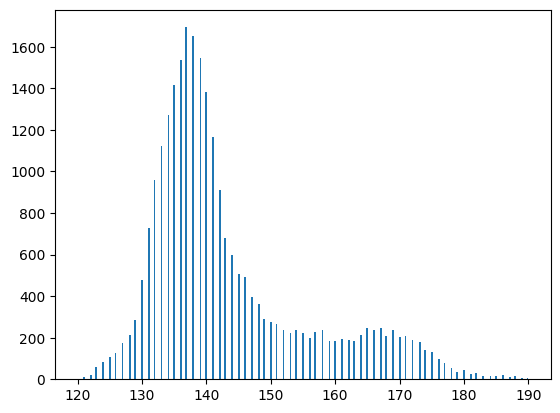

In [669]:
plt.hist(local_region_inv.flatten() , 255 , range = (120,190))

In [670]:
thresholder = (local_region_inv > 150)
Black = (local_region_inv < 150)

In [671]:
local_region_inv[thresholder] = 255
local_region_inv[Black] = 0

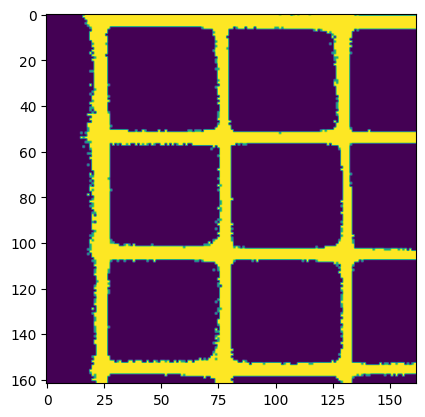

In [672]:
plt.imshow(local_region_inv)

In [673]:
import numpy as np
np.gcd(np.shape(img_gray)[1] ,np.shape(img_gray)[0] )

648

In [674]:
np.shape(img_gray)

(1944, 2592)

In [675]:
x_range = np.arange(0,2593,162)

In [676]:
np.mean(local_region_inv.flatten())

56.8741426611797

In [677]:
y_range = np.arange(0,1945,162)

In [678]:
left_bottom = img_gray[-250:-1 , 0:200]

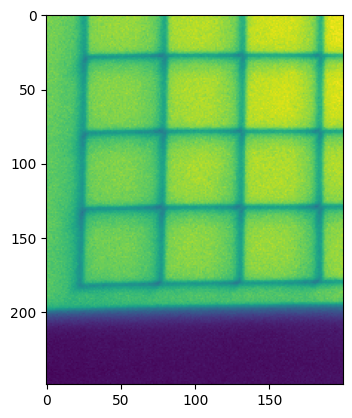

In [679]:
plt.imshow(left_bottom)

In [ ]:
plt.hist(left_bottom.flatten() , 255)

In [ ]:
White = (left_bottom > 90)
black = (left_bottom < 90)


In [ ]:
left_bottom[White] = 0
left_bottom[black] = 255

In [ ]:
plt.imshow(left_bottom)

In [ ]:
np.shape(img_gray.flatten())


In [680]:
ret1 , thresh= cv2.threshold(left_bottom,100,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

66.0


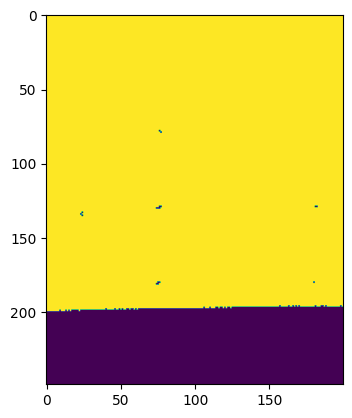

In [691]:
plt.imshow(thresh)
print(ret1)

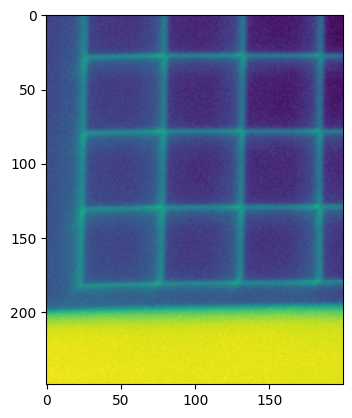

In [688]:
deneme = np.array(np.absolute(img_gray[-250:-1 , 0:200] - (255/1)))
plt.imshow(deneme)

In [689]:
ret2 , thresh= cv2.threshold(deneme,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

error: OpenCV(4.6.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\thresh.cpp:1555: error: (-2:Unspecified error) in function 'double __cdecl cv::threshold(const class cv::_InputArray &,const class cv::_OutputArray &,double,double,int)'
> THRESH_OTSU mode:
>     'src_type == CV_8UC1 || src_type == CV_16UC1'
> where
>     'src_type' is 6 (CV_64FC1)
